问题 2-1：使用包括 Am241， Cm244， Pu239 的三组份α源产生的 5 种能量的α粒
子，对高纯硅探测器进行能量刻度，得到的信号幅度见表 2.1 所示。若用该探测
器设备探测未知能量的带电粒子，测得的信号幅度为 1588mV,请计算该粒子的能
量为多少 keV？

根据已有的五组数据插值计算

In [25]:
import numpy as np
import matplotlib.pyplot as plt

energy_source = np.zeros(5)
signal_source = np.zeros(5)

with open('calibrate.dat', 'r') as fin:
    i = 0
    for lines in fin:
        words = lines.split()
        energy_source[i] = float(words[0])
        signal_source[i] = float(words[1])
        i += 1

[5557.84122769]


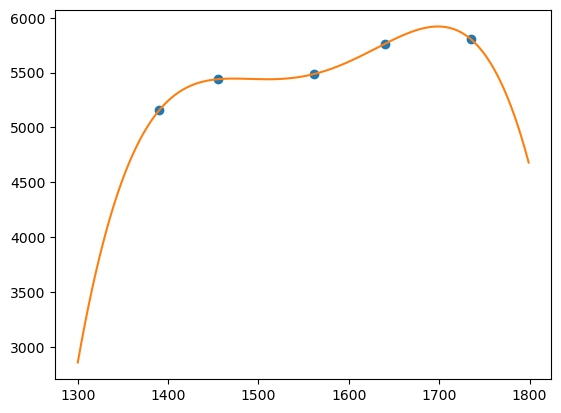

In [26]:
#手动实现：对于n个数据点(x1, y1)...(xn, yn)
#y(x) = \sigma_{j=1}^{n}A_j(x)y_j
#其中A_j(x) = \Pi_{i \neq j}  \frac{x-x_i}{x_j - x_i}

def lagr_poly(x0, y0, x):
    """
    x0: array of x values
    y0: array of y values
    x: value to evaluate at
    """
    x = np.array(x)
    n = len(x0)
    L = np.ones((n, len(x)))
    for i in range(0, n):
        for j in range(0, n):
            if i != j:
                L[i] = L[i] * (x - x0[j]) / (x0[i] - x0[j])
    y = np.dot(y0, L)

    return y

signal = np.arange(1300, 1800, 1)
energy = lagr_poly(signal_source, energy_source, signal)

print(lagr_poly(signal_source, energy_source, [1588]))
plt.plot(signal_source, energy_source, 'o')
plt.plot(signal, energy)
plt.show()




5557.841227572411


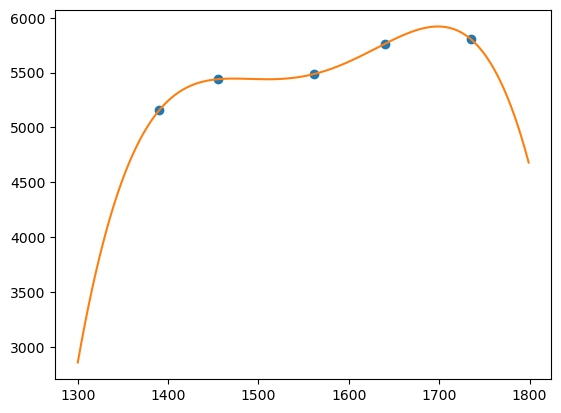

In [27]:
#也可以直接调包
from scipy import interpolate
poly = interpolate.lagrange(signal_source, energy_source)

signal = np.arange(1300, 1800, 1)
energy = poly(signal)

print(poly(1588))
plt.plot(signal_source, energy_source, 'o')
plt.plot(signal, energy)
plt.show()
        

三次样条插值

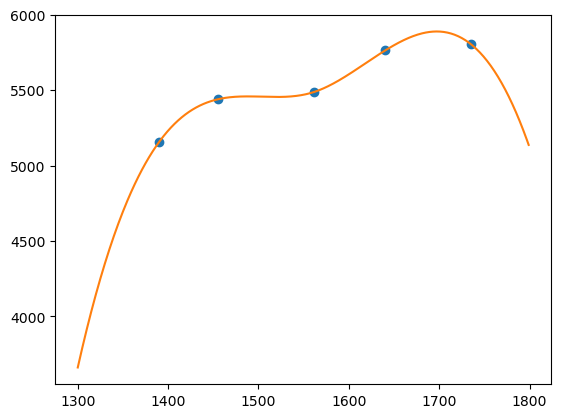

In [29]:
from scipy import interpolate
tck = interpolate.splrep(signal_source, energy_source, k=3, s=1.2)

signal = np.arange(1300, 1800, 1)
energy = interpolate.splev(signal, tck, der=0)

plt.plot(signal_source, energy_source, 'o')
plt.plot(signal, energy)

一阶中心差分法计算导数

Text(0, 0.5, 'Cv')

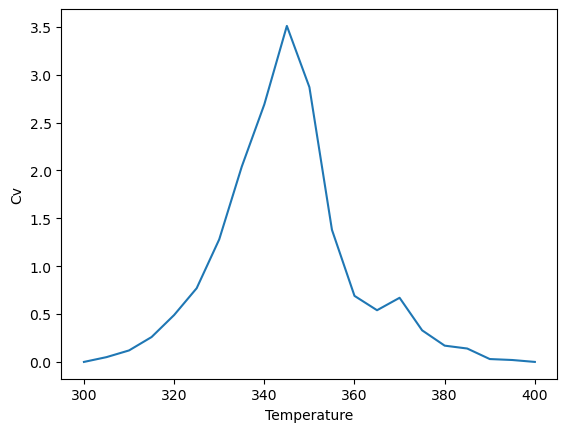

In [31]:
temperature = []
energy = []
with open('etot-temp.dat', 'r') as f:
    for lines in f:
        words = lines.split()
        T = float(words[0])
        E = float(words[1])
        temperature.append(T)
        energy.append(E)

n = len(temperature)
Cv = [0] * n 
for i in range(1, n-1):
    Cv[i] = (energy[i+1] - energy[i-1]) / (temperature[i+1] - temperature[i-1])

plt.plot(temperature, Cv)
plt.xlabel('Temperature')
plt.ylabel('Cv')

如图 2.9 所示，一长为 2m 的带电细杆，其电荷线密度为𝜆(𝑥) =
𝑒^-x^2
.请计算带电细杆在二维平面(x,y)内产生的静电势分布。

/var/folders/n2/td6lyvzx2pd6703265_bhdl80000gn/T/ipykernel_21352/169284925.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-x**2) / np.sqrt((x-x0) ** 2 + y0 ** 2)


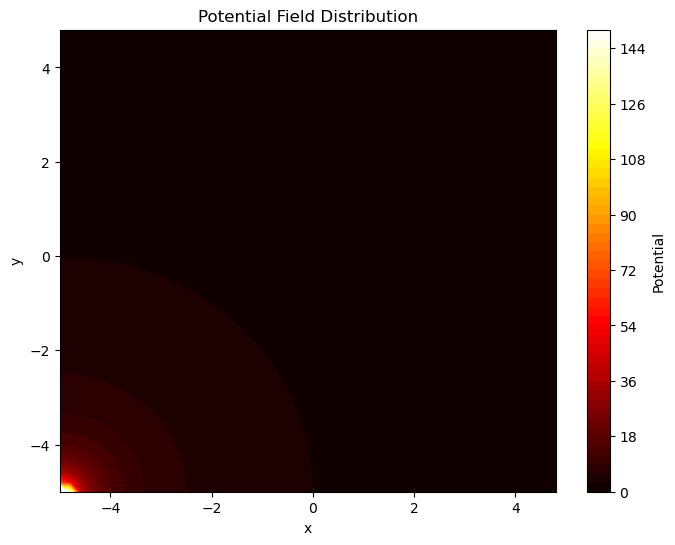

In [40]:
import numpy as np
import matplotlib.pyplot as plt

N = 101 #点的个数
A = 1 #杆的半长度
c = 1 #单位1/4\pi\epsilon_0

def f(x, x0, y0):
    return np.exp(-x**2) / np.sqrt((x-x0) ** 2 + y0 ** 2)

x_list = np.zeros(N)
h = 2 * A / (N-1) #积分步长
for i in range(0, N):
    x_list[i] = i*h - A
x_axis = np.arange(-5, 5, 0.2)
y_axis = np.arange(-5, 5, 0.2)
field = []

for x0 in range(len(x_axis)):
    for y0 in range(len(y_axis)):
        v = 0
        for i in range(0, N-1):
            v += f(x_list[i], x0, y0)
        field.append(v)

afield = np.array(field)
afield = afield.reshape(len(x_axis), len(y_axis))
afield_T = afield.T

extent = [x_axis[0], x_axis[-1], y_axis[0], y_axis[-1]]

plt.figure(figsize=(8, 6))
plt.contourf(x_axis, y_axis, afield_T, levels=50, cmap='hot', extent=extent)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potential Field Distribution')
plt.colorbar(label='Potential')
plt.show()


In [37]:
#用插值函数来积分（梯形公式）

for x0 in range(len(x_axis)):
    for y0 in range(len(y_axis)):
        v = 0
        for i in range(N-1):
            v += 0.5 * f(x_list[i], x0, y0) + f(x_list[i+1], x0, y0)
        field.append(v)

print(field)







/var/folders/n2/td6lyvzx2pd6703265_bhdl80000gn/T/ipykernel_21352/1611169965.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-x**2) / np.sqrt((x-x0) ** 2 + y0 ** 2)


[inf, 67.6824130215852, 36.259260506322484, 24.55703263579548, 18.525515348514585, 14.861380689411401, 12.403277125486925, 10.641167216463687, 9.316605722622702, 8.28484131345631, 7.458559857273356, 6.781992915538621, 6.217862699141231, 5.740310389564408, 5.330837397327341, 4.975861990795791, 4.665188229105156, 4.39101323415566, 4.147264273635796, 3.9291445698436744, 3.732815007472071, 3.555166567045115, 3.3936546893739394, 3.2461767654503095, 3.1109801996572806, 2.98659250203663, 2.8717674890630462, 2.7654434233616465, 2.6667101120704952, 2.5747828043978074, 2.4889813039289215, 2.408713119566147, 2.333459772637242, 2.2627655913825264, 2.196228481215996, 2.1334922759704895, 2.0742403629807376, 2.018190341205754, 1.9650895222415377, 1.9147111230472385, 1.866851029419241, 1.821325032832889, 1.7779664618068038, 1.7366241436036896, 1.6971606437440394, 1.6594507401409486, 1.6233800961713671, 1.588844103069702, 1.5557468669626842, 1.5240003198918575, 148.21498625528088, 53.63845855437419, 33

In [ ]:
for x0 in x_axis:
    for y0 in y_axis:
        v = 0
        for i in range(0, N-1, 2):
            v += 1/3 * (f(x_list[i], x0, y0) + 4 * f(x_list[i+1], x0, y0) + f(x_list[i+2], x0, y0))
        field.append(v)
        